In [398]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [399]:
!dir

 Volume in drive C is Windows
 Volume Serial Number is B233-0680

 Directory of C:\data science

09-03-2024  09:44    <DIR>          .
23-02-2024  15:42    <DIR>          .ipynb_checkpoints
31-10-2023  15:40           119,042 100-pandas-puzzles-with-solutions.ipynb
30-10-2023  10:36            50,963 100-pandas-puzzles.ipynb
13-02-2024  21:21            15,286 2024_population.csv
28-11-2023  10:10             5,925 Advanced html parsing.ipynb
19-10-2023  21:44           540,200 amazon_laptop_prices_v01.csv
22-08-2023  09:02               556 anscombe.csv
12-10-2023  11:12               303 archive (1).zip
12-10-2023  11:14             7,438 archive (2).zip
12-10-2023  20:00            22,170 archive (3).zip
12-10-2023  11:14            16,570 archive (4).zip
12-10-2023  11:15            74,370 archive (5).zip
12-10-2023  11:15         9,277,600 archive (6).zip
12-10-2023  11:17            83,276 archive (7).zip
12-10-2023  11:17             5,575 archive (8).zip
12-10-2023  11:13      

In [400]:
df = pd.read_csv("kerala.csv.xls")

In [401]:
df

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL,FLOODS
0,KERALA,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,3248.6,YES
1,KERALA,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,3326.6,YES
2,KERALA,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,3271.2,YES
3,KERALA,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,3129.7,YES
4,KERALA,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,2741.6,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,KERALA,2014,4.6,10.3,17.9,95.7,251.0,454.4,677.8,733.9,298.8,355.5,99.5,47.2,3046.4,YES
114,KERALA,2015,3.1,5.8,50.1,214.1,201.8,563.6,406.0,252.2,292.9,308.1,223.6,79.4,2600.6,NO
115,KERALA,2016,2.4,3.8,35.9,143.0,186.4,522.2,412.3,325.5,173.2,225.9,125.4,23.6,2176.6,NO
116,KERALA,2017,1.9,6.8,8.9,43.6,173.5,498.5,319.6,531.8,209.5,192.4,92.5,38.1,2117.1,NO


we are going to study about the june and july th rain density data and checking that when the density is 500 above ,the flood is occured or not

In [402]:
floods = df[["YEAR","JUN","JUL","FLOODS"]]

In [403]:
df["SUBDIVISION"].unique()

array(['KERALA', 'KERALA '], dtype=object)

we converted it in to our needed data

now lets check the 500 above density data

before that im checking whether there is any null values in the data set

In [404]:
floods.isnull().sum()

YEAR      0
JUN       0
JUL       0
FLOODS    0
dtype: int64

there is no such null values

lets check the data types because we are dealing with numerical dataset

In [405]:
floods.dtypes

YEAR        int64
JUN       float64
JUL       float64
FLOODS     object
dtype: object

In [406]:
df["FLOODS"].value_counts()

YES    60
NO     58
Name: FLOODS, dtype: int64

In [407]:
floods["FLOODS"].unique()

array(['YES', 'NO'], dtype=object)

FLOODS feature is having data type as object , we need to convert it into integer

In [408]:
floods["FLOODS"] = floods["FLOODS"].map({'YES':1,'NO':0})

In [409]:
floods.dtypes

YEAR        int64
JUN       float64
JUL       float64
FLOODS      int64
dtype: object

probability of flooding in a year is it rained more than 500mm threshold in these months,so we need to create more features

In [410]:
floods["JUN_GT_500"] = (floods["JUN"] > 500).astype("int")
floods["JUL_GT_500"] = (floods["JUL"] > 500).astype("int")
df_small = floods.loc[:,["YEAR","JUN_GT_500","JUL_GT_500","FLOODS"]]

In [411]:
df_small

,YEAR,JUN_GT_500,JUL_GT_500,FLOODS
0,1901,1,1,1
1,1902,0,1,1
2,1903,1,1,1
3,1904,1,1,1
4,1905,1,1,0
...,...,...,...,...
113,2014,0,1,1
114,2015,1,0,0
115,2016,1,0,0
116,2017,0,0,0


In [412]:
pd.crosstab(df_small["FLOODS"],df_small["JUN_GT_500"],margins=True)

JUN_GT_500,0,1,All
FLOODS,,,
0,19,39,58
1,6,54,60
All,25,93,118


P(A) = Probability of Flooding

P(B) = Probability of having more than 500 mm rain

P(AnB) = Probability flooding and having more than 500 mm rain in june

P(A|B) = probability flooding given it rained more than 500 mm in june


P(A) = (6+54) / (19+39+6+54) = 0.5084745762711864

In [413]:
(6+54) / (19+39+6+54)

0.5084745762711864

P(B) = (39+54) / (19+39+6+54) = 0.788135593220339

In [414]:
(39+54) / (19+39+6+54)

0.788135593220339

P(AnB) = 54 / (19+39+6+54) = 0.4576271186440678

In [415]:
 54 / (19+39+6+54)

0.4576271186440678

P(A|B)=0.4576271186440678/0.788135593220339 = 0.5806451612903226

In [416]:
0.4576271186440678/0.788135593220339

0.5806451612903226

probability flooding given it rained more than 500 mm in june is 58 percentage

In [417]:
pd.crosstab(df_small["FLOODS"],df_small["JUL_GT_500"],margins=True)

JUL_GT_500,0,1,All
FLOODS,,,
0,19,39,58
1,3,57,60
All,22,96,118


P(A) = Probability of Flooding

P(B) = Probability of having more than 500 mm rain

P(AnB) = Probability flooding and having more than 500 mm rain in july

P(A|B) = probability flooding given it rained more than 500 mm in july

P(A) = (3+57) / (19+39+3+57) = 0.5084745762711864

In [418]:
(3+57) / (19+39+3+57)

0.5084745762711864

P(B) = (39+57) / (19+39+3+57) = 0.8135593220338984

In [419]:
(39+57) / (19+39+3+57)

0.8135593220338984

P(AnB) = (57) / (19+39+3+57) = 0.4830508474576271

In [420]:
(57) / (19+39+3+57)

0.4830508474576271

P(A|B) = 0.4830508474576271/0.8135593220338984 = 0.59375

In [421]:
0.4830508474576271/0.8135593220338984

0.59375

probability flooding given it rained more than 500 mm in july is 59 percentage

In [422]:
df["SUBDIVISION"].unique()

array(['KERALA', 'KERALA '], dtype=object)

In [423]:
df.isnull().sum()

SUBDIVISION         0
YEAR                0
JAN                 0
FEB                 0
MAR                 0
APR                 0
MAY                 0
JUN                 0
JUL                 0
AUG                 0
SEP                 0
OCT                 0
NOV                 0
DEC                 0
 ANNUAL RAINFALL    0
FLOODS              0
dtype: int64

In [424]:
cols = df.columns

In [426]:
df


,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL,FLOODS
0,KERALA,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,3248.6,YES
1,KERALA,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,3326.6,YES
2,KERALA,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,3271.2,YES
3,KERALA,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,3129.7,YES
4,KERALA,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,2741.6,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,KERALA,2014,4.6,10.3,17.9,95.7,251.0,454.4,677.8,733.9,298.8,355.5,99.5,47.2,3046.4,YES
114,KERALA,2015,3.1,5.8,50.1,214.1,201.8,563.6,406.0,252.2,292.9,308.1,223.6,79.4,2600.6,NO
115,KERALA,2016,2.4,3.8,35.9,143.0,186.4,522.2,412.3,325.5,173.2,225.9,125.4,23.6,2176.6,NO
116,KERALA,2017,1.9,6.8,8.9,43.6,173.5,498.5,319.6,531.8,209.5,192.4,92.5,38.1,2117.1,NO


In [427]:
df.shape

(118, 16)

In [428]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SUBDIVISION       118 non-null    object 
 1   YEAR              118 non-null    int64  
 2   JAN               118 non-null    float64
 3   FEB               118 non-null    float64
 4   MAR               118 non-null    float64
 5   APR               118 non-null    float64
 6   MAY               118 non-null    float64
 7   JUN               118 non-null    float64
 8   JUL               118 non-null    float64
 9   AUG               118 non-null    float64
 10  SEP               118 non-null    float64
 11  OCT               118 non-null    float64
 12  NOV               118 non-null    float64
 13  DEC               118 non-null    float64
 14   ANNUAL RAINFALL  118 non-null    float64
 15  FLOODS            118 non-null    object 
dtypes: float64(13), int64(1), object(2)
memory u

In [429]:
df.describe(include="all")

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL,FLOODS
count,118,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118
unique,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,KERALA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,YES
freq,117,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60
mean,NaN,1959.500000,12.218644,15.633898,36.670339,110.330508,228.644915,651.617797,698.220339,430.369492,246.207627,293.207627,162.311017,40.009322,2925.405085,NaN
std,NaN,34.207699,15.473766,16.406290,30.063862,44.633452,147.548778,186.181363,228.988966,181.980463,121.901131,93.705253,83.200485,36.676330,452.169407,NaN
min,NaN,1901.000000,0.000000,0.000000,0.100000,13.100000,53.400000,196.800000,167.500000,178.600000,41.300000,68.500000,31.500000,0.100000,2068.800000,NaN
25%,NaN,1930.250000,2.175000,4.700000,18.100000,74.350000,125.050000,535.550000,533.200000,316.725000,155.425000,222.125000,93.025000,10.350000,2613.525000,NaN
50%,NaN,1959.500000,5.800000,8.350000,28.400000,110.400000,184.600000,625.600000,691.650000,386.250000,223.550000,284.300000,152.450000,31.100000,2934.300000,NaN
75%,NaN,1988.750000,18.175000,21.400000,49.825000,136.450000,264.875000,786.975000,832.425000,500.100000,334.500000,355.150000,218.325000,54.025000,3170.400000,NaN


here we can see the Average Density which the rain fall occured in each month 


and the maximum and minimum range of densiity occured

In [430]:
df

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL,FLOODS
0,KERALA,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,3248.6,YES
1,KERALA,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,3326.6,YES
2,KERALA,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,3271.2,YES
3,KERALA,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,3129.7,YES
4,KERALA,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,2741.6,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,KERALA,2014,4.6,10.3,17.9,95.7,251.0,454.4,677.8,733.9,298.8,355.5,99.5,47.2,3046.4,YES
114,KERALA,2015,3.1,5.8,50.1,214.1,201.8,563.6,406.0,252.2,292.9,308.1,223.6,79.4,2600.6,NO
115,KERALA,2016,2.4,3.8,35.9,143.0,186.4,522.2,412.3,325.5,173.2,225.9,125.4,23.6,2176.6,NO
116,KERALA,2017,1.9,6.8,8.9,43.6,173.5,498.5,319.6,531.8,209.5,192.4,92.5,38.1,2117.1,NO


In [462]:
filtered_teams = df[(df['YEAR'] >= 2000) & (df['YEAR'] <= 2018)]
print(filtered_teams[[' ANNUAL RAINFALL', 'YEAR']])

      ANNUAL RAINFALL  YEAR
99             2412.6  2000
100            2931.1  2001
101            2507.4  2002
102            2394.9  2003
103            2886.1  2004
104            3031.1  2005
105            3420.6  2006
106            3489.6  2007
107            2524.5  2008
108            2810.6  2009
109            3131.8  2010
110            3035.1  2011
111            2151.1  2012
112            3255.4  2013
113            3046.4  2014
114            2600.6  2015
115            2176.6  2016
116            2117.1  2017
117            4473.0  2018


Annual rainfall and year sum

In [463]:
top_5_teams = df.nlargest(5, ' ANNUAL RAINFALL')
print(top_5_teams[['YEAR', ' ANNUAL RAINFALL']])

     YEAR   ANNUAL RAINFALL
117  2018            4473.0
60   1961            4257.8
23   1924            4226.4
32   1933            4072.9
58   1959            3746.0


In [431]:
df.loc[df[' ANNUAL RAINFALL'].idxmax()]

SUBDIVISION         KERALA
YEAR                  2018
JAN                   29.1
FEB                   52.1
MAR                   48.6
APR                  116.4
MAY                  183.8
JUN                  625.4
JUL                 1048.5
AUG                 1398.9
SEP                  423.6
OCT                  356.1
NOV                  125.4
DEC                   65.1
 ANNUAL RAINFALL    4473.0
FLOODS                 YES
Name: 117, dtype: object

here we can see largest rain fall occured year and full details

In [432]:
df.loc[df[' ANNUAL RAINFALL'].idxmin()]

SUBDIVISION         KERALA
YEAR                  1976
JAN                    0.1
FEB                    1.5
MAR                   21.0
APR                  134.5
MAY                   75.8
JUN                  196.8
JUL                  641.5
AUG                  342.6
SEP                  116.2
OCT                  221.3
NOV                  286.7
DEC                   30.8
 ANNUAL RAINFALL    2068.8
FLOODS                  NO
Name: 75, dtype: object

and here we have the minimum annual rainfall density

lets see the average rainfall occured 

In [433]:
df[" ANNUAL RAINFALL"].mean()

2925.4050847457625

<Axes: >

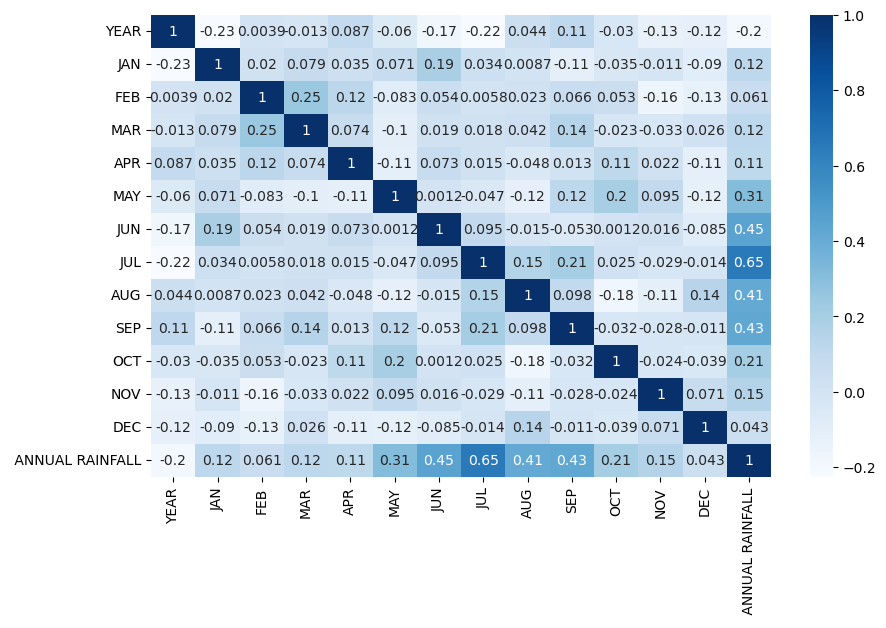

In [434]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),cbar = True,annot = True,cmap = "Blues")

july is having a more positive relation with annual rainfall which indicates that july is more rain fall each year

In [435]:
df_month = df[["JAN","FEB","MAR","APR","MAY","JUN","JUL","AUG","SEP","NOV","DEC"]]

<Axes: >

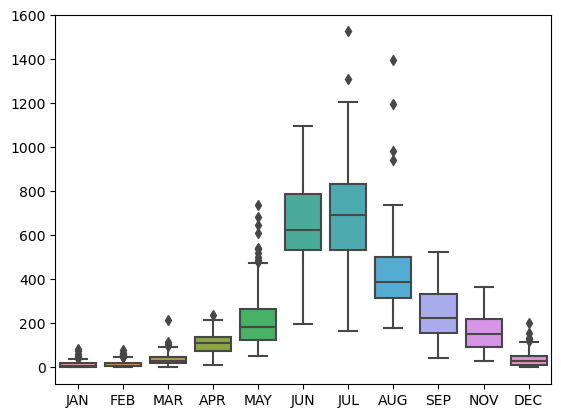

In [436]:
sns.boxplot(df_month)

now we have known a basic knowledge on the data

lets build a model and predict the targeted values

before that lets split the data 

In [438]:
from sklearn.preprocessing import LabelEncoder

In [439]:
enc = LabelEncoder()
df["FLOODS"] = enc.fit_transform(df["FLOODS"])

In [440]:
X = df.drop(columns=["SUBDIVISION","FLOODS"])
y = df["FLOODS"]


In [441]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42 )

In [457]:
y_train

44     0
12     0
15     1
70     1
107    0
      ..
106    1
14     1
92     0
51     0
102    0
Name: FLOODS, Length: 94, dtype: int32

In [442]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [443]:
models = [LogisticRegression(max_iter=1000),SVC(kernel="linear"),KNeighborsClassifier(),RandomForestClassifier(),DecisionTreeClassifier()]

In [444]:
def compare_models():
    for model in models:
        model.fit(x_train,y_train)
        y_pred = model.predict(x_test)
        accuracy = accuracy_score(y_test,y_pred)
        print("Accuracy score ",model,"=",accuracy)
        print(y_pred)

In [445]:
compare_models()

Accuracy score  LogisticRegression(max_iter=1000) = 1.0
[1 0 0 1 1 0 0 0 1 0 1 0 1 1 1 1 0 1 1 1 0 1 0 1]
Accuracy score  SVC(kernel='linear') = 0.9583333333333334
[1 0 0 1 1 0 0 0 1 0 1 0 1 1 1 1 0 1 1 1 0 1 0 0]
Accuracy score  KNeighborsClassifier() = 1.0
[1 0 0 1 1 0 0 0 1 0 1 0 1 1 1 1 0 1 1 1 0 1 0 1]
Accuracy score  RandomForestClassifier() = 1.0
[1 0 0 1 1 0 0 0 1 0 1 0 1 1 1 1 0 1 1 1 0 1 0 1]
Accuracy score  DecisionTreeClassifier() = 1.0
[1 0 0 1 1 0 0 0 1 0 1 0 1 1 1 1 0 1 1 1 0 1 0 1]


In [446]:
from sklearn.model_selection import cross_val_score 

In [458]:
cv_score_rand = cross_val_score(RandomForestClassifier(),X,y,cv=5)

In [459]:
cv_score_rand

array([1.        , 1.        , 1.        , 0.95652174, 0.95652174])

In [460]:
mean_acc_rand = sum(cv_score_rand)/5
per = mean_acc_rand * 100
round(per,2)

98.26

In [447]:
def compare_model_cross_validation():
    for model in models:
        cv_score = cross_val_score(model,X,y,cv=5)
        mean_acc = (sum(cv_score)/5)*100
        mean_acc = round(mean_acc,2)

        print("Cross validation for ",model , "= ",cv_score)
        print("mean accureacy ",model,mean_acc)
        

In [448]:
compare_model_cross_validation()

Cross validation for  LogisticRegression(max_iter=1000) =  [0.95833333 1.         1.         1.         0.91304348]
mean accureacy  LogisticRegression(max_iter=1000) 97.43
Cross validation for  SVC(kernel='linear') =  [0.95833333 0.91666667 0.875      1.         0.95652174]
mean accureacy  SVC(kernel='linear') 94.13
Cross validation for  KNeighborsClassifier() =  [0.95833333 0.95833333 1.         0.95652174 0.91304348]
mean accureacy  KNeighborsClassifier() 95.72
Cross validation for  RandomForestClassifier() =  [1.         1.         1.         1.         0.95652174]
mean accureacy  RandomForestClassifier() 99.13
Cross validation for  DecisionTreeClassifier() =  [1.         1.         1.         0.95652174 0.95652174]
mean accureacy  DecisionTreeClassifier() 98.26


In [449]:
from sklearn.model_selection import GridSearchCV


In [450]:
model = RandomForestClassifier()

In [451]:
parametre = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],

}

In [452]:
flood_classifier = GridSearchCV(model,parametre,cv=5)

In [453]:
flood_classifier.fit(X,y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10, 20],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]})

In [454]:
flood_classifier.cv_results_

{'mean_fit_time': array([0.09324079, 0.17325277, 0.25305471, 0.08725872, 0.17202177,
        0.2675386 , 0.09414167, 0.17513022, 0.25604029, 0.08600135,
        0.1288835 , 0.18734851, 0.06400404, 0.12431049, 0.17877774,
        0.06606517, 0.12326322, 0.1800818 , 0.06415439, 0.12355967,
        0.186935  , 0.06424518, 0.12557359, 0.18179693, 0.0620585 ,
        0.12392592, 0.18398676, 0.06058497, 0.12208996, 0.18568187,
        0.06088605, 0.12924404, 0.18613753, 0.06489978, 0.12659335,
        0.18589411, 0.06523747, 0.12806611, 0.18360548, 0.06380625,
        0.12240114, 0.19451776, 0.06190314, 0.12055082, 0.18745875,
        0.06069622, 0.12019401, 0.18224587, 0.06497974, 0.12306914,
        0.18228478, 0.0662015 , 0.12456827, 0.19463768, 0.0612257 ,
        0.12618814, 0.18096023, 0.06213937, 0.12230129, 0.22598977,
        0.07085395, 0.13110867, 0.1997417 , 0.06913037, 0.13986139,
        0.20818372, 0.06881237, 0.13049574, 0.2102479 , 0.06814694,
        0.13386598, 0.19818907,

In [346]:
best_compinations = flood_classifier.best_params_

In [347]:
best_compinations

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 50}

In [351]:
rand = RandomForestClassifier(max_features = "sqrt",min_samples_leaf = 1,min_samples_split = 5,n_estimators=50)
rand

RandomForestClassifier(min_samples_split=5, n_estimators=50)

In [352]:
acc = flood_classifier.best_score_

In [353]:
acc

0.9913043478260869

In [355]:
rand.fit(x_train,y_train)

RandomForestClassifier(min_samples_split=5, n_estimators=50)

In [392]:
y_pred = rand.predict(x_test)

In [393]:
y_pred

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1])

In [394]:
from sklearn.metrics import recall_score,precision_score

In [395]:
recall= recall_score(y_test,y_pred)
prec = precision_score(y_test,y_pred)

In [396]:
recall

1.0

In [397]:
prec

1.0